# Problem Set 1

In [2]:
import numpy as np

import astropy.units as u
import astropy.constants as const

In [89]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

## 2.1

### a

In [10]:
Teff = 2700 * u.K
L = 10**(5.5) * u.L_sun
R = np.sqrt(L / (4 * np.pi * const.sigma_sb * Teff**4))
R.to(u.Rsun).round(0)

<Quantity 2570. solRad>

### b

In [20]:
M = 20 * u.Msun
rho = M / (4/3 * np.pi * R**3)
rho.to(u.kg / u.m**3).round(8)

<Quantity 1.66e-06 kg / m3>

### c

In [37]:
def escape_velocity(M, R):
    return np.sqrt(2 * const.G * M / R)
    
v_esc = escape_velocity(M, R)
v_esc.to(u.m / u.s).round(-2)

<Quantity 54500. m / s>

### d

In [50]:
# ratios
rho_sun = 1.41 * u.g/u.cm**3
print(R.to(u.Rsun).round(0).value)
print((rho / rho_sun).decompose())
print((v_esc / escape_velocity(u.Msun, u.Rsun)).decompose())

2570.0
1.1781084645660287e-09
0.08821697906566281


## 4.4

In [77]:
import matplotlib.pyplot as plt

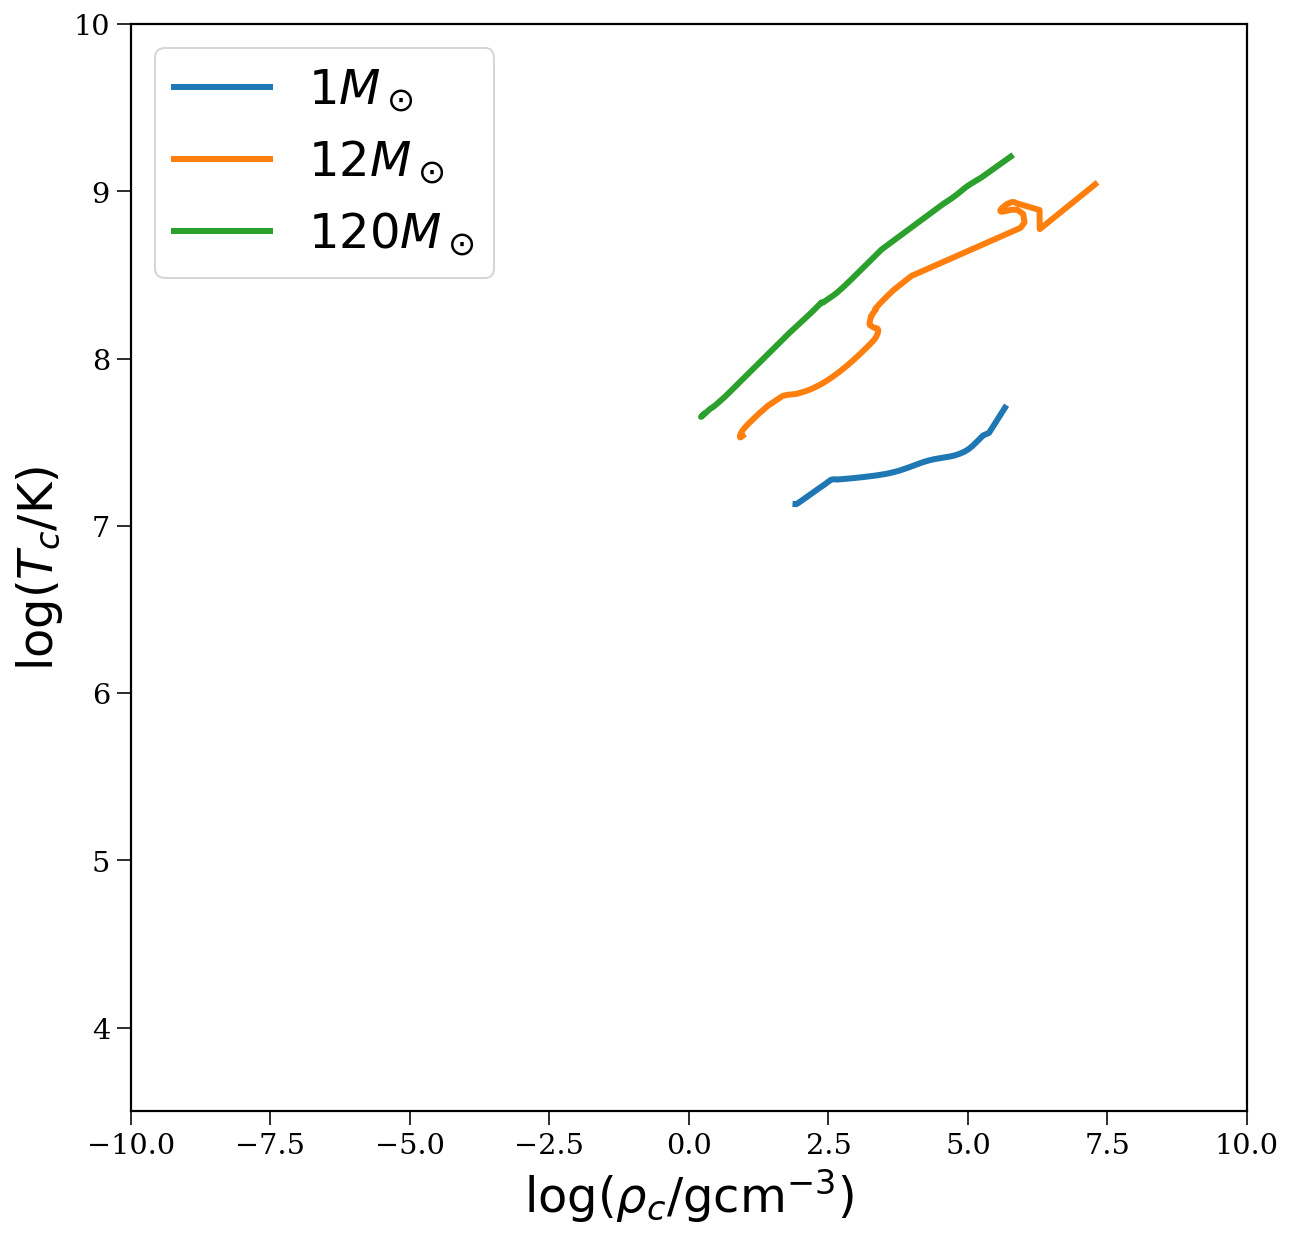

In [99]:
files = ["1msun.dat", "12msun.dat", "120msun.dat"]
labels = [r"$1 M_{\rm \odot}$", r"$12 M_{\rm \odot}$", r"$120 M_{\rm \odot}$"]

fig, ax = plt.subplots(figsize=(10, 10))

for file, label in zip(files, labels):
    df = pd.read_fwf("data/{}".format(file), index_col=0, skiprows=0)
    df.drop(df.index[0], inplace=True)
    
    ax.plot(df["lg(rhoc)"].values.astype(float), df["lg(Tc)"].values.astype(float),
            label=label, lw=3)
    
ax.legend()    

ax.set_xlabel(r"$\log (\rho_c / \mathrm{g cm^{-3}})$")
ax.set_ylabel(r"$\log (T_c / \mathrm{K})$")

ax.set_xlim(-10, 10)
ax.set_ylim(3.5, 10)

plt.show()